# Module 2 Final Project

## Hypothesis Testing using the Northwind Database

Below is the ERD of the fictional Northwind Database from Microsoft which I will be accessing through sqlalchemy.

<img src="Northwind_ERD.png">

In [28]:
q = """SELECT * FROM OrderDetail WHERE OrderId = 10248"""
df3 = pd.read_sql_query(q, engine)
df3.head()

2018-12-04 11:22:20,817 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail WHERE OrderId = 10248
2018-12-04 11:22:20,818 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0


In [19]:
q = """SELECT OrderId, (Quantity * UnitPrice) Total FROM OrderDetail"""
df3 = pd.read_sql_query(q, engine)
df3.head()

2018-12-04 11:19:14,394 INFO sqlalchemy.engine.base.Engine SELECT OrderId, (Quantity * UnitPrice) Total FROM OrderDetail
2018-12-04 11:19:14,397 INFO sqlalchemy.engine.base.Engine ()


,OrderId,Total
0,10248,168.0
1,10248,98.0
2,10248,174.0
3,10249,167.4
4,10249,1696.0


In [ ]:
q = """SELECT LastName, FirstName, COUNT(*) as TerritoriesAssigned from \
Employee \
JOIN EmployeeTerritory et on Employee.Id = et.employeeId \
GROUP BY Employee.lastname \
ORDER BY TerritoriesAssigned DESC"""

In [36]:
q = """SELECT OrderId, ShipRegion, (UnitPrice*Quantity) Total FROM 'Order' JOIN OrderDetail OD ON 'Order'.Id = OD.OrderId GROUP BY OrderId"""
df2 = pd.read_sql_query(q, engine)
df2


2018-12-04 11:33:43,100 INFO sqlalchemy.engine.base.Engine SELECT OrderId, ShipRegion, (UnitPrice*Quantity) Total FROM 'Order' JOIN OrderDetail OD ON 'Order'.Id = OD.OrderId GROUP BY OrderId
2018-12-04 11:33:43,102 INFO sqlalchemy.engine.base.Engine ()


,OrderId,ShipRegion,Total
0,10248,Western Europe,174.00
1,10249,Western Europe,1696.00
2,10250,South America,252.00
3,10251,Western Europe,336.00
4,10252,Western Europe,1088.00
5,10253,South America,640.00
6,10254,Western Europe,168.00
7,10255,Western Europe,1320.00
8,10256,South America,124.80
9,10257,South America,156.00


In [21]:
df2.shape

(1788650, 3)

In [8]:
df2.ShipRegion.unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

In [3]:
q = """SELECT OrderId, UnitPrice*Quantity TotalPrice FROM OrderDetail JOIN 'Order' GROUP BY OrderId"""
df2 = pd.read_sql_query(q, engine)
df2.head()

2018-12-03 13:29:37,610 INFO sqlalchemy.engine.base.Engine SELECT OrderId, UnitPrice*Quantity TotalPrice FROM OrderDetail JOIN 'Order' GROUP BY OrderId
2018-12-03 13:29:37,614 INFO sqlalchemy.engine.base.Engine ()


,OrderId,TotalPrice
0,10248,174.0
1,10249,1696.0
2,10250,252.0
3,10251,336.0
4,10252,1088.0


### Question 1: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?


#### Preparing Data

Step 1: connect to database, inspect

In [1]:
import sqlalchemy
from sqlalchemy import *



engine = create_engine('''sqlite:///Northwind_small.sqlite''', echo=True)
conn = engine.connect()

inspector = inspect(engine)

# Get names of tables in database
print (inspector.get_table_names())

2018-12-04 11:10:05,960 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-12-04 11:10:05,964 INFO sqlalchemy.engine.base.Engine ()
2018-12-04 11:10:05,967 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-12-04 11:10:05,969 INFO sqlalchemy.engine.base.Engine ()
2018-12-04 11:10:05,974 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2018-12-04 11:10:05,975 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


Step 2: Create a DataFrame using pandas to easily access and view relevant information.

In [2]:
import pandas as pd

df_full = pd.read_sql_query('''SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail GROUP BY OrderId''', engine)
df_no_disc = pd.read_sql_query('''SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount == 0 GROUP BY OrderId''', engine)
df_disc = pd.read_sql_query('''SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount != 0 GROUP BY OrderId''', engine)

2018-12-04 11:10:08,948 INFO sqlalchemy.engine.base.Engine SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail GROUP BY OrderId
2018-12-04 11:10:08,949 INFO sqlalchemy.engine.base.Engine ()
2018-12-04 11:10:08,971 INFO sqlalchemy.engine.base.Engine SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount == 0 GROUP BY OrderId
2018-12-04 11:10:08,971 INFO sqlalchemy.engine.base.Engine ()
2018-12-04 11:10:08,979 INFO sqlalchemy.engine.base.Engine SELECT OrderID, ProductId, UnitPrice, Quantity, Discount FROM OrderDetail WHERE Discount != 0 GROUP BY OrderId
2018-12-04 11:10:08,980 INFO sqlalchemy.engine.base.Engine ()


#### Defining **$H_0$** and **$H_A$** 

The question is whether or not a discount on a product will affect the quantity of said product in an order. As a result, the null hypothesis is that the mean quantity of products ordered is equal for products with and without a discount. The alternative is that the mean for discounted and non-discounted product is different. Thus, we will be conducting a two-tailed test.

##### **$H_0$** : $\mu_0$ =  $\mu_1$
##### **$H_A$** : $\mu_0$ $\neq$ $\mu_1$

In [3]:
import numpy as np
from scipy import stats 
import math

In [4]:
# finding mean quantity for total population, discounted items, and non-discounted items

mean_all = df_full['Quantity'].mean()
mean_disc = df_disc['Quantity'].mean()
mean_no_disc = df_no_disc['Quantity'].mean()

print("Mean quantity ordered for all items: ", mean_all)
print("Mean quantity ordered for discounted items: ", mean_disc)
print("Mean quantity ordered for non_discounted items: ", mean_no_disc)

Mean quantity ordered for all items:  22.88313253012048
Mean quantity ordered for discounted items:  27.38157894736842
Mean quantity ordered for non_discounted items:  21.034257748776508


Here, I create arrays for the quantities of items ordered in the control group (non-discounted items) and the experimental group (discounted items). Then, I plot their probability distributions to get a preliminary visual understanding of the differences in their distribution.

In [5]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [6]:
control = np.array(df_no_disc.Quantity)
exp = np.array(df_disc.Quantity)

In [7]:
def evaluate_PDF(rv, x = 4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

In [8]:
control_mean = np.mean(control)
control_std = np.std(control)
control_dist = stats.norm(control_mean, control_std)

exp_mean = np.mean(exp)
exp_std = np.std(exp)
exp_dist = stats.norm(exp_mean, exp_std)

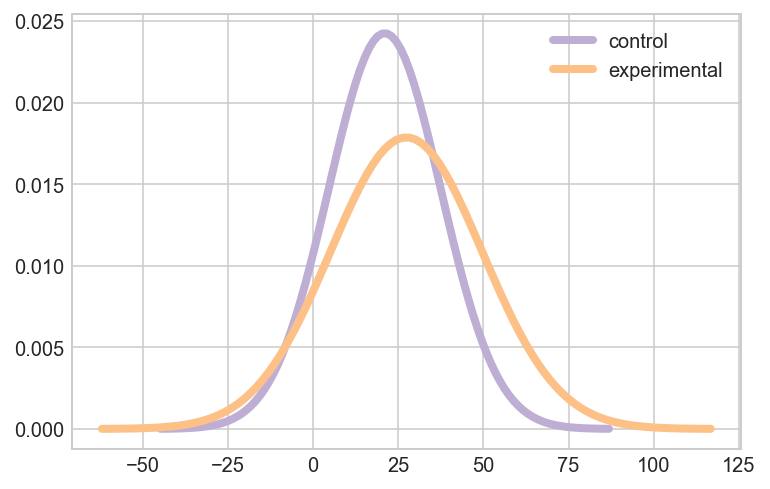

In [9]:
# control
xs, ys = evaluate_PDF(control_dist)
plt.plot(xs, ys, label='control', linewidth=4, color='#beaed4') 

# experimental 
xs, ys = evaluate_PDF(exp_dist)
plt.plot(xs, ys, label='experimental', linewidth=4, color='#fdc086')
plt.legend()

We can see that there is a noticeable difference in the two distributions. The discounted products having a higher mean and standard deviation than non-discounted products. We proceed to check if the differences observed are significant. The first step is to find the difference of the means between the two groups, then calculating the t-statistic. I will use Welch's t-test, because it is more reliable than the student's t-test because if sample sizes and variances are unequal and equally reliable if the sample sizes and variances are the same.

In [10]:
def welch_t(a, b):
    x1_bar = np.mean(a)
    x2_bar = np.mean(b)
    n1 = len(a)
    n2 = len(b)
    s1 = a.var(ddof = 1)
    s2 = b.var(ddof = 1)
    """ Calculate Welch's t statistic for two samples. """
    top = x1_bar - x2_bar
    bottom = (s1/n1) + (s2/n2)

    t = top/np.sqrt(bottom)
    
    return t

def welch_df(a, b):
    n1 = len(a)
    v1 = len(a) - 1
    n2 = len(b)
    v2 = len(b) - 1
    s1 = a.var(ddof = 1)
    s2 = b.var(ddof = 1)
    top = (s1/n1) + (s2/n2)
    bottom = (s1**2/((n1**2)*v1)) + (s2**2/((n2**2)*v2))
    """ Calculate the effective degrees of freedom for two samples. """

    df = top**2/bottom
    return df


In [11]:
t_statistic = welch_t(control, exp)
t_df = welch_df(control, exp)

print("Welch's t-statistic: {}, degrees of freedom: {}".format(t_statistic, t_df))

Welch's t-statistic: -4.7869822811073, degrees of freedom: 632.3223963844281


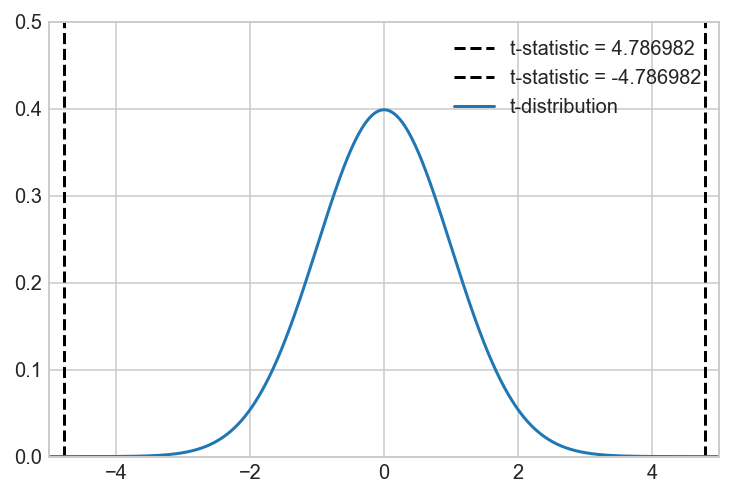

In [12]:
plt.figure()
plt.axvline(x = t_statistic, linestyle = '--', color = 'black', label = 't-statistic = 4.786982')
plt.axvline(x = -t_statistic, linestyle = '--', color = 'black', label = 't-statistic = -4.786982')
x = np.linspace(-5,5, 1000)
t_dist = stats.t.pdf(x, t_df)
plt.plot(x, stats.t.pdf(x, t_df), label = 't-distribution')
plt.fill_between(x, 0, t_dist, where=(x >= -t_statistic), color='grey')
plt.fill_between(x, 0, t_dist, where=(x <= t_statistic), color='grey')
plt.xlim(-5,5)
plt.ylim(0,0.5)
plt.legend()

In [13]:
def p_value(a, b):

    "Two-sided t-test for two samples a and b."

    t = welch_t(a,b)
    df = welch_df(a,b)
    
    p = stats.t.cdf(-np.abs(t), df)

    return t, 2*p

p_value(control, exp)

(-4.7869822811073, 2.110199250302849e-06)

In [14]:
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Cohen_d(exp, control)

0.3354975173084513

Now, I confirm the results using the t-test from sciPy stats.

In [15]:
stats.ttest_ind_from_stats(control_mean, control_std, len(control), exp_mean, exp_std, len(exp), equal_var = False)

Ttest_indResult(statistic=-4.792688920550706, pvalue=2.0529165007644316e-06)

As visualized above, there are virtually no values that fall outside the t-statistic in the distribution. The p-value calculated is very close to zero, meaning that the results are statistically signifcant. Also, the interpretation of Cohen's d (0.3355), is that a discount has a low-to-medium effect on the quantity ordered. The null hypothesis is rejected, and we can conclude that discounted items have a higher average quantity in orders than non-discounted items. Now, we check what levels of discount lead to statistically significant increases in order quantities.


To proceed, we check how many items are offered at each level of discount.

In [16]:
df_disc.Discount.unique()

array([0.15, 0.05, 0.2 , 0.25, 0.1 , 0.01])

In [17]:
print("items with 1% discount:", len(df_disc.loc[df_disc.Discount == 0.01]))
print("items with 5% discount:", len(df_disc.loc[df_disc.Discount == 0.05]))
print("items with 10% discount:", len(df_disc.loc[df_disc.Discount == 0.1]))
print("items with 15% discount:", len(df_disc.loc[df_disc.Discount == 0.15]))
print("items with 20% discount:", len(df_disc.loc[df_disc.Discount == 0.2]))
print("items with 25% discount:", len(df_disc.loc[df_disc.Discount == 0.25]))

items with 1% discount: 1
items with 5% discount: 86
items with 10% discount: 74
items with 15% discount: 75
items with 20% discount: 72
items with 25% discount: 72


Since there is only one item with a 1% discount, I will group it together with the 5% discounted items and then run two sample t-tests for each group of items. 

In [18]:
df_disc.loc[df_disc.Discount == 0.01]['Quantity']

379    2
Name: Quantity, dtype: int64

In [19]:
disc_1_5 = np.array([df_disc.loc[df_disc.Discount == 0.05]["Quantity"]])
disc_1_5 = np.append(disc_1_5, 2)

In [20]:
disc_10 = np.array(df_disc.loc[df_disc.Discount == 0.1]["Quantity"])
disc_15 = np.array(df_disc.loc[df_disc.Discount == 0.15]["Quantity"])
disc_20 = np.array(df_disc.loc[df_disc.Discount == 0.20]["Quantity"])
disc_25 = np.array(df_disc.loc[df_disc.Discount == 0.25]["Quantity"])

In [21]:
disc_d = dict()

In [22]:
disc_d.update({'1-5%': disc_1_5, '10%': disc_10, '15%': disc_15, '20%': disc_20, '25%': disc_25})

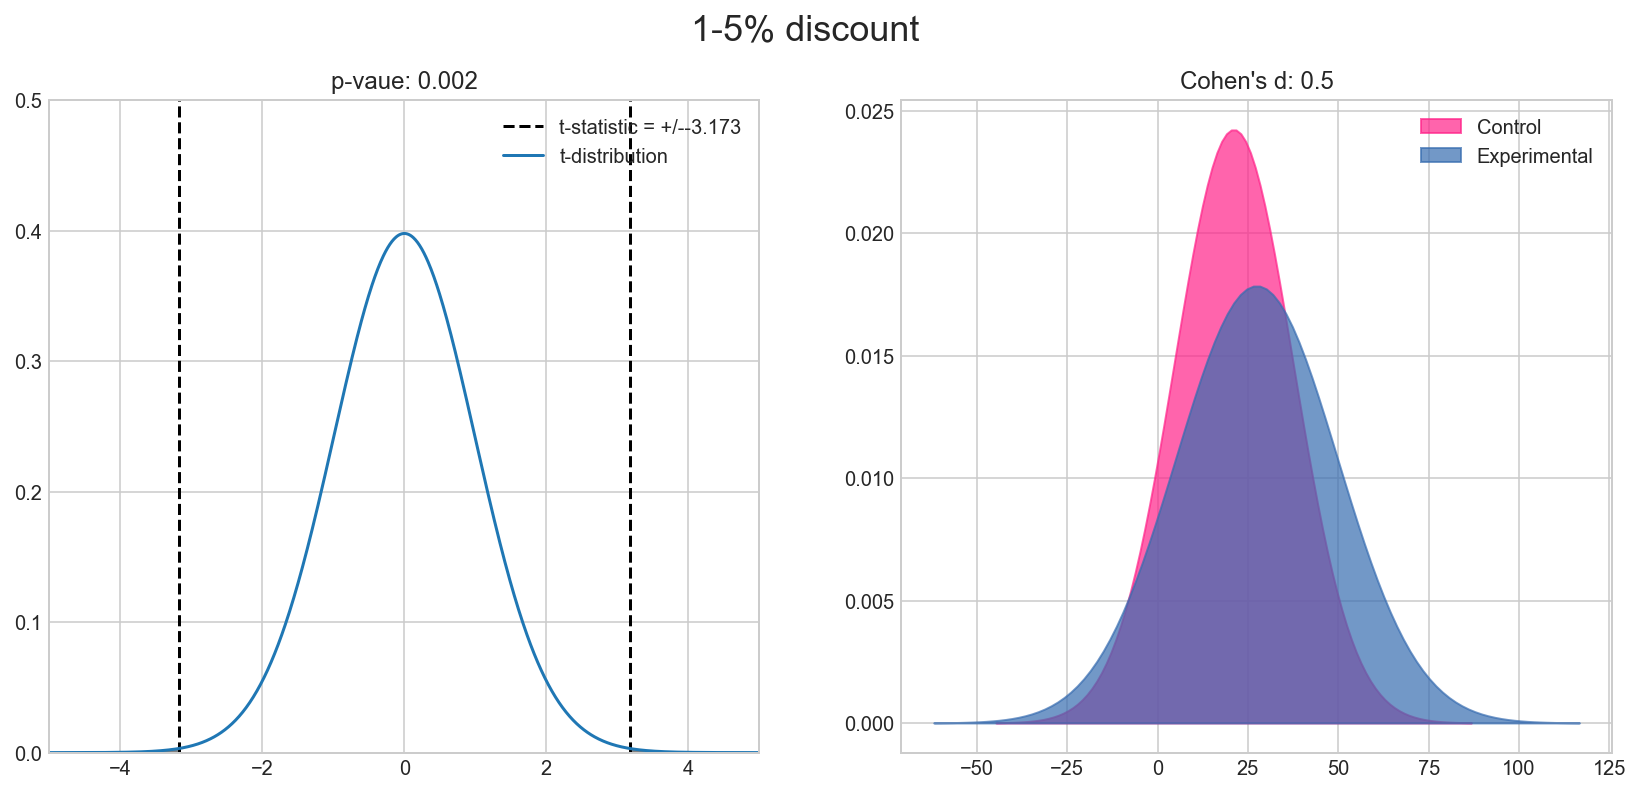

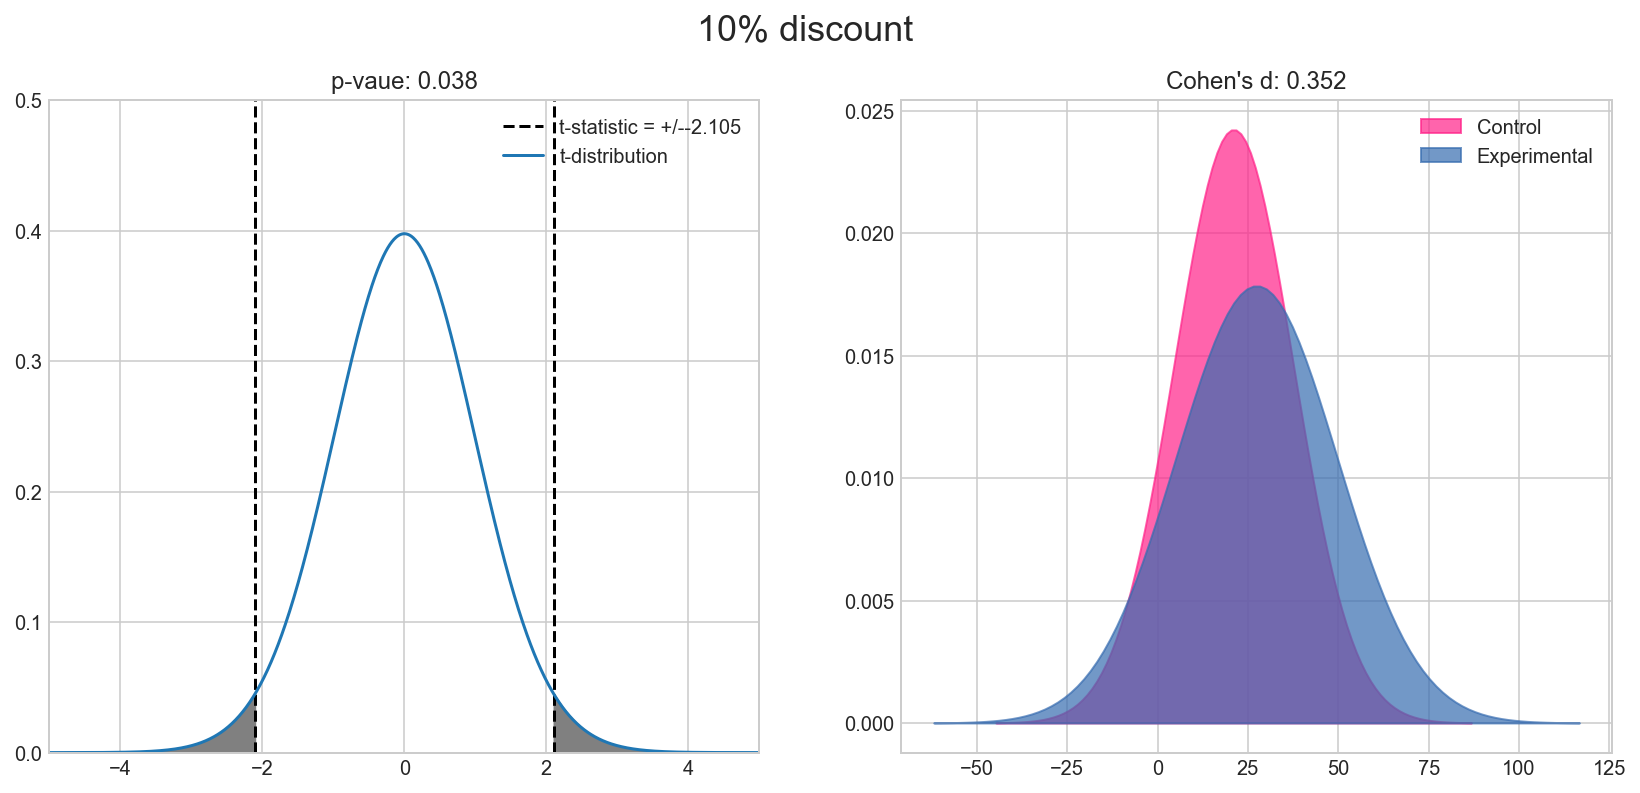

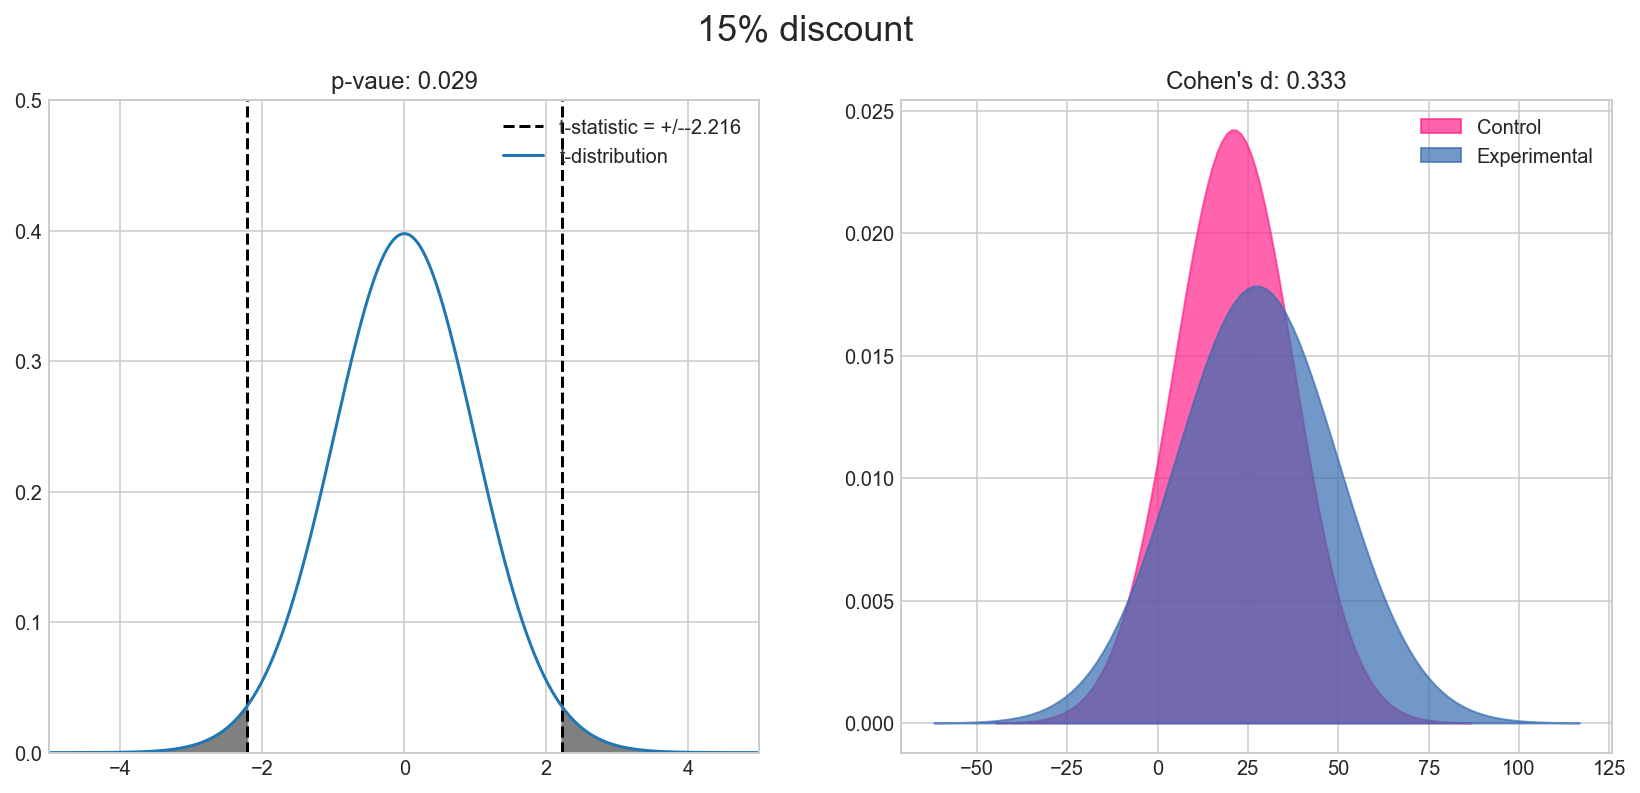

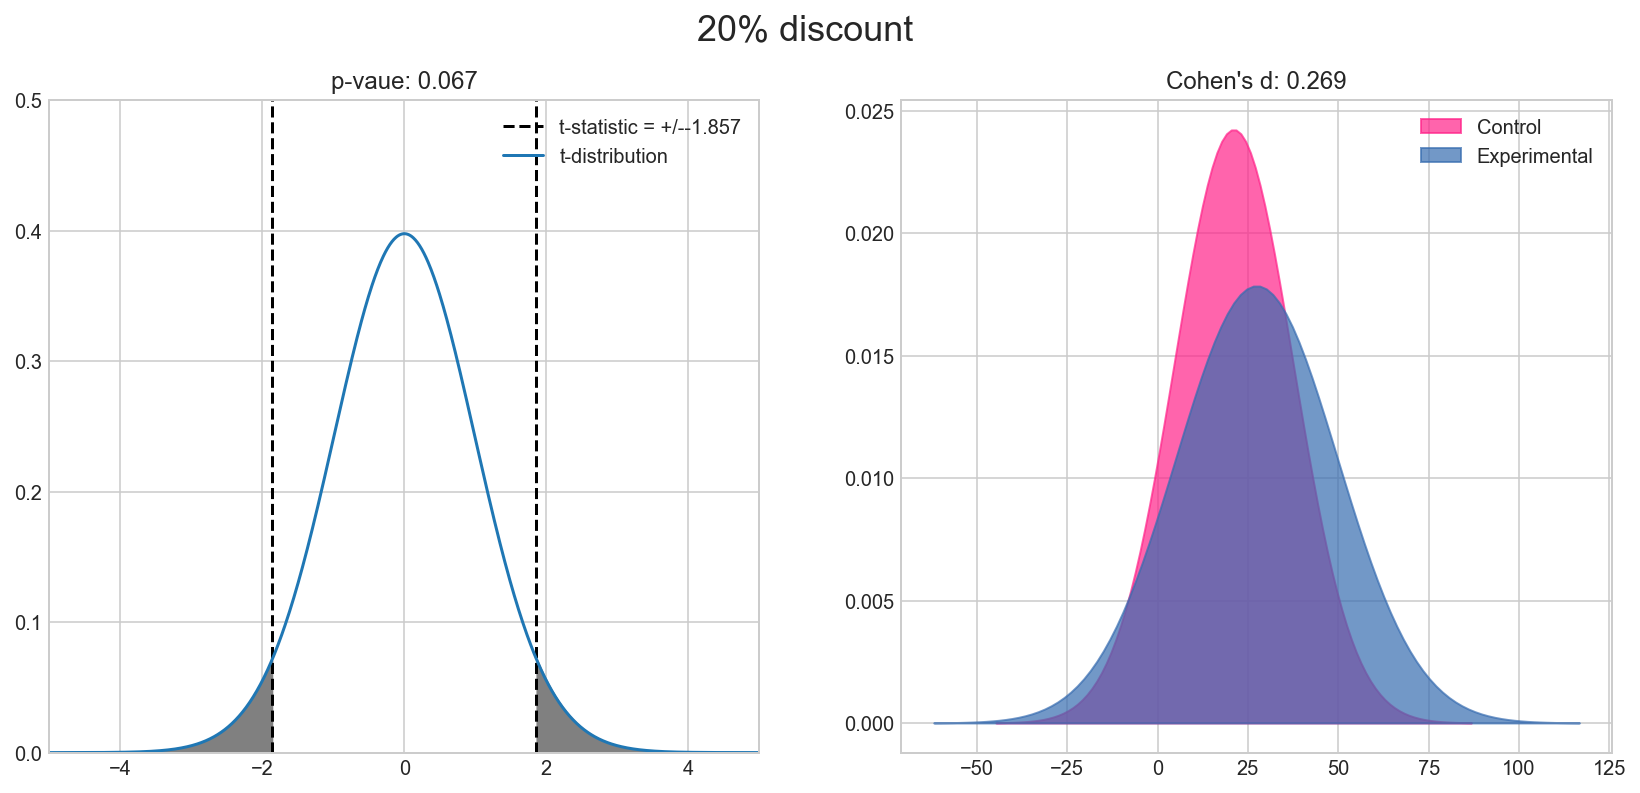

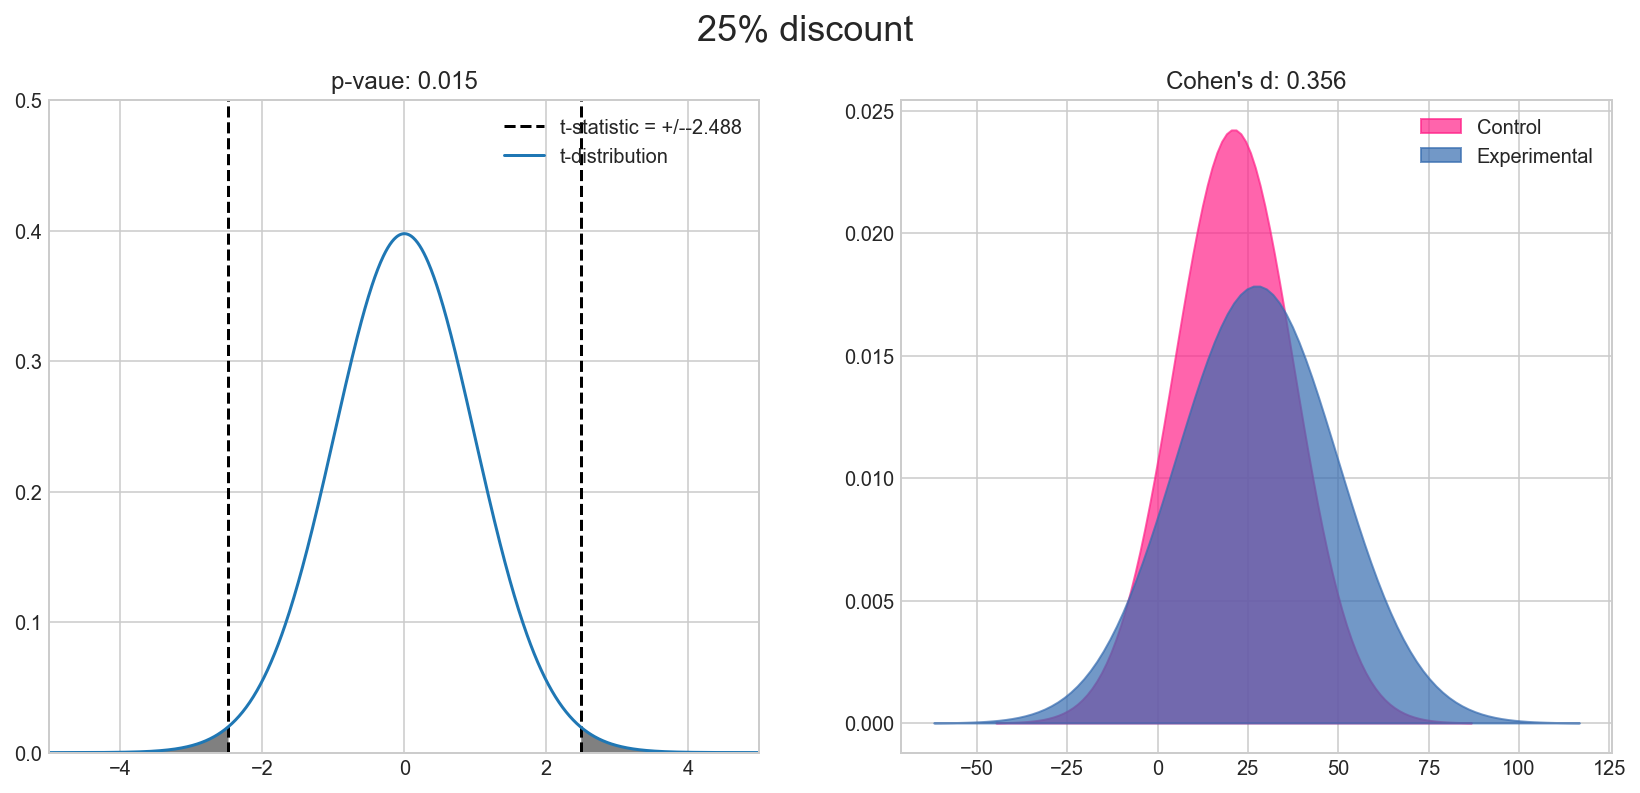

In [23]:
for disc, sample in disc_d.items():
    # getting t-statistic and degrees of freedom
    t_statistic = welch_t(control, sample)
    t_df = welch_df(control, sample)
    
    # plotting the t-distribution and t-statistic 
    fig = plt.figure(figsize = (14,6))
    fig.suptitle('{} discount'.format(disc), fontsize = 18)
    ax1 = fig.add_subplot(121)
    ax1.set_title('p-vaue: {}'.format(p_value(control, sample)[1].round(3)))
    ax1.axvline(x = t_statistic, linestyle = '--', color = 'black', label = 't-statistic = +/-{}'.format(t_statistic.round(3)))
    ax1.axvline(x = -t_statistic, linestyle = '--', color = 'black')
    x = np.linspace(-5,5, 1000)
    t_dist = stats.t.pdf(x, t_df)
    ax1.plot(x, stats.t.pdf(x, t_df), label = 't-distribution')
    ax1.fill_between(x, 0, t_dist, where=(x >= -t_statistic), color='grey')
    ax1.fill_between(x, 0, t_dist, where=(x <= t_statistic), color='grey')
    ax1.set_xlim(-5,5)
    ax1.set_ylim(0,0.5)
    ax1.legend(loc = 1)

    
    # plotting the pdf of each and finding Cohen's d
    # control

    control_mean = np.mean(control)
    control_std = np.std(control)
    control_dist = stats.norm(control_mean, control_std)

    xs, ys = evaluate_PDF(control_dist)
    
    ax2 = fig.add_subplot(122)
    ax2.fill_between(xs, ys, label='Control', color='#ff2289', alpha=0.7)

    # experimental 
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    sample_dist = stats.norm(exp_mean, exp_std)
    xs, ys = evaluate_PDF(sample_dist)
    ax2.fill_between(xs, ys, label='Experimental', color='#376cb0', alpha=0.7)
    ax2.set_title("Cohen's d: {}".format(Cohen_d(sample, control).round(3)))
    ax2.legend()
    

    

All but one level of discount yielded a significant difference of quantity of items ordered. Surprisingly, a 20% discount does not yield statistically significant results at alpha = 0.05. 

### Question 2: Do seafood products generally cost more per unit than meat/poultry products?

#### Preparing Data

First, I will create dataframe for Category table to determine which Category ID corresponds to the categories of interest. Then, I will create dataframes for products in the categories of Seafood and Confection and view the descriptive statistics of the unit price for each.

In [24]:
cat = pd.read_sql_query("""SELECT * FROM Category""", engine)
cat

2018-11-30 13:58:21,420 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2018-11-30 13:58:21,423 INFO sqlalchemy.engine.base.Engine ()


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


As displayed, Seafood is category 8 while meat/poultry is category 6. I now use SQL's WHERE clauses to retrieve the relevant data for each category.

In [25]:
S_F = pd.read_sql_query("""SELECT ProductName, UnitPrice FROM Product WHERE CategoryId = 8 GROUP BY ProductName""", engine)
S_F

2018-11-30 13:58:21,465 INFO sqlalchemy.engine.base.Engine SELECT ProductName, UnitPrice FROM Product WHERE CategoryId = 8 GROUP BY ProductName
2018-11-30 13:58:21,466 INFO sqlalchemy.engine.base.Engine ()


,ProductName,UnitPrice
0,Boston Crab Meat,18.40
1,Carnarvon Tigers,62.50
2,Escargots de Bourgogne,13.25
3,Gravad lax,26.00
4,Ikura,31.00
5,Inlagd Sill,19.00
6,Jack's New England Clam Chowder,9.65
7,Konbu,6.00
8,Nord-Ost Matjeshering,25.89
9,Rogede sild,9.50


In [26]:
S_F.UnitPrice.describe()

count    12.000000
mean     20.682500
std      15.207198
min       6.000000
25%      11.412500
50%      16.700000
75%      25.917500
max      62.500000
Name: UnitPrice, dtype: float64

In [27]:
M_P = pd.read_sql_query("""SELECT ProductName, UnitPrice FROM Product WHERE CategoryId = 6 GROUP BY ProductName""", engine)
M_P

2018-11-30 13:58:21,514 INFO sqlalchemy.engine.base.Engine SELECT ProductName, UnitPrice FROM Product WHERE CategoryId = 6 GROUP BY ProductName
2018-11-30 13:58:21,517 INFO sqlalchemy.engine.base.Engine ()


,ProductName,UnitPrice
0,Alice Mutton,39.00
1,Mishi Kobe Niku,97.00
2,Perth Pasties,32.80
3,Pâté chinois,24.00
4,Thüringer Rostbratwurst,123.79
5,Tourtière,7.45


In [28]:
M_P.UnitPrice.describe()

count      6.000000
mean      54.006667
std       45.740543
min        7.450000
25%       26.200000
50%       35.900000
75%       82.500000
max      123.790000
Name: UnitPrice, dtype: float64

#### Defining **$H_0$** and **$H_A$** 

To determine whether or not seafood products generally cost more per unit than meat/poultry, I will use a one-sided, two sample t-test with a null hypothesis that the two means are equal. The alternative is that the mean price of seafood products is greater than that of meat/poultry products.

##### **$H_A$** : $\mu_S$ =  $\mu_M$
##### **$H_A$** : $\mu_S$ > $\mu_M$

There are only 12 unique products in seafood and 6 in meat/poultry. This is a smaller sample than I expected, so I will determine what would be an acceptable sample size with my chosen values of $\alpha$ and $\beta$. To do this, I find an estimate of the sample variance and use the following equation to find n, my required sample size.
### $n=\frac{(z_\alpha+z_\beta)^2\sigma^2}{(\mu_1-\mu_0)^2}$

In [29]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

In [30]:
def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = variance(sample1), variance(sample2)
    return (var_1 + var_2)/((n_1 + n_2)-2)

In [31]:
var = sample_variance(S_F.UnitPrice, M_P.UnitPrice)

In [32]:
def compute_n(alpha, beta, mu_0, mu_1, var):
    z_alpha = stats.norm.ppf(alpha)
    z_beta = stats.norm.ppf(beta)
    num = ((z_alpha+z_beta)**2)*var
    den = (mu_1 - mu_0)**2
    return num/den

alpha = .05 #Part of A/B test design
beta = .01 #Part of A/B test design
mu_0 = 20.68 #Part of A/B test design
mu_1 = 54.01 #Part of A/B test design


compute_n(alpha, beta, mu_0, mu_1, var)

11.53873084212327

The result is that each sample must be at least of size 12. Since this requirement is not fulfilled by my data, I will generate values from a normal distribution with the mean and standard deviation of each sample. Next, I will use a student's t-test since the sample sizes are equal and to try something new.

In [33]:
norm_S = np.random.normal(S_F.UnitPrice.mean(), S_F.UnitPrice.std(), 1000)
norm_M = np.random.normal(M_P.UnitPrice.mean(), M_P.UnitPrice.std(), 1000)

In [34]:
results = stats.ttest_ind(norm_S,norm_M)
results[0]

-22.700967609973386

The p-value is 8.036370343753578e-96
Reject Null Hypothesis. The results are statistically significant at alpha = 0.05
View the plot below for a visualization of the p-value


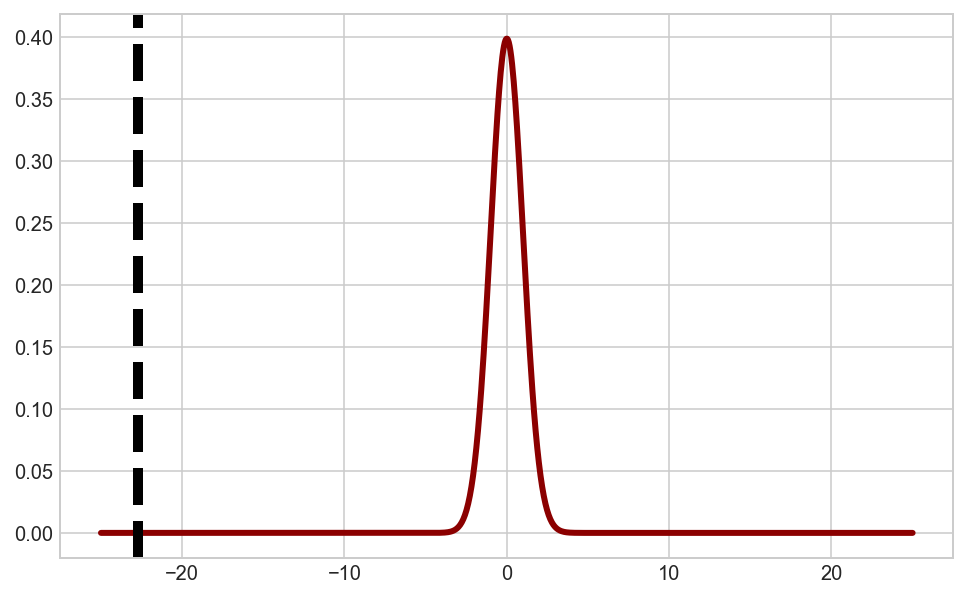

In [35]:
def two_sample_one_sided(a, b):
    "One-sided t-test for two samples a and b."
    "Determines whether or not to reject the Null Hypothesis and visualizes the p-value"
    results = stats.ttest_ind(a, b, equal_var = False)
    one_sided_p = results[1]/2
    if one_sided_p < 0.05:
        decision = "Reject Null Hypothesis. The results are statistically significant at alpha = 0.05"
    else:
        decision = "Fail to reject the Null Hypothesis. The results are not statistically significant at alpha = 0.05"
    print("The p-value is {}".format(one_sided_p))
    print(decision)
    print("View the plot below for a visualization of the t-value")
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-25, 25, 1000)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (len(a)+len(b)), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(results[0], color='black', linestyle='--', lw=5)
    #x.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()

two_sample_one_sided(norm_S, norm_M)